# Analysing Tartu Smart Bike usage data 2019-2021

In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [4]:
data2019 = pd.read_csv("2019.csv", sep=',', header=0)
print("2019: ",data2019.shape)
data2020 = pd.read_csv("2020.csv", sep=',', header=0)
print("2020: ",data2020.shape)
data2021 = pd.read_csv("2021.csv", sep=',', header=0)
print("2021: ",data2021.shape)

2019:  (742559, 12)
2020:  (874032, 12)
2021:  (85004, 12)


In [5]:
#data2019 = data2019.drop(columns=['startstationserialnumber','endstationserialnumber'])
# Eemalda peatused.
data2019 = data2019.drop(data2019[(data2019.startstationname == 'Warehouse') | (data2019.endstationname == 'Warehouse')].index)
data2019 = data2019.drop(data2019[(data2019.startstationname == 'Lauluväljak') | (data2019.endstationname == 'Lauluväljak')].index)
data2019 = data2019.drop(data2019[(data2019.startstationname == 'SPARK Demo') | (data2019.endstationname == 'SPARK Demo')].index)
data2019 = data2019.drop(data2019[(data2019.startstationname == 'Töökoda') | (data2019.endstationname == 'Töökoda')].index)
data2019 = data2019.drop(data2019[(data2019.startstationname == "Tour d'ÖÖ") | (data2019.endstationname == "Tour d'ÖÖ")].index)
data2019 = data2019.drop(data2019[(data2019.startstationname == "-- Määramata --") | (data2019.endstationname == "-- Määramata --")].index)
data2019 = data2019.drop(data2019[(data2019.startstationname == "Metallica parkla") | (data2019.endstationname == "Metallica parkla")].index)
data2019 = data2019.drop(data2019[(data2019.startstationname == "Undetermined") | (data2019.endstationname == "Undetermined")].index)
# Eemalda sõidud alla 50m.
data2019 = data2019.drop(data2019[data2019['length'] < 0.05].index)
# Eemalda sõidud pikkusega 0m.
data2019 = data2019.drop(data2019[data2019.length == 0].index)

#data2019[['yearOfBirth', 'first3IdNumber']] - vali mitu tulpa korraga

data2019['first3IdNumber'] = data2019['first3IdNumber'].fillna("NaN")
# Määra sünniaasta andmetüübiks 'sõne'.
data2019['yearOfBirth'] = data2019['yearOfBirth'].astype(str)
# Eemalda sünniaasta lõpust '.0'.
data2019['yearOfBirth'] = data2019['yearOfBirth'].str[:-2]
data2019['yearOfBirth'] = data2019['yearOfBirth'].replace('n', '000')



# Eemalda ID-kaardi numbrid, mille pikkus on lühem kui 3.
data2019 = data2019.drop(data2019[data2019['first3IdNumber'].str.len() != 3].index)
# Eemalda ID-kaardi numbrid, mis ei kuulu massiivi kaardi esimese numbri põhjal.
synNr = ['N','1','2','3','4','5','6']
data2019 = data2019.drop(data2019[~data2019['first3IdNumber'].str[0].isin(synNr)].index)
# Eemalda üksik kirje
data2019 = data2019.drop(data2019[data2019['first3IdNumber'] == '3ü1'].index)

# ID-kaardi põhjal sünniaasta genereerimine
data2019.loc[((data2019['first3IdNumber'].str[0] == '1') | (data2019['first3IdNumber'].str[0] == '2')),'yearOfBirth'] = ('18' + data2019['first3IdNumber'].str[1:])
data2019.loc[((data2019['first3IdNumber'].str[0] == '3') | (data2019['first3IdNumber'].str[0] == '4')),'yearOfBirth'] = ('19' + data2019['first3IdNumber'].str[1:])
data2019.loc[((data2019['first3IdNumber'].str[0] == '5') | (data2019['first3IdNumber'].str[0] == '6')),'yearOfBirth'] = ('20' + data2019['first3IdNumber'].str[1:])

# Sünniaasta ja ID-kaardi numbrid ei kattu
data2019[['yearOfBirth', 'first3IdNumber']].loc[(data2019['yearOfBirth'].str[2:4] != data2019['first3IdNumber'].str[1:]) & ((data2019['yearOfBirth'].str[:3] != '000') & (data2019['first3IdNumber'] != 'NaN'))]
# Sünniaasta puudub, ID-kaart olemas
#data2019[['yearOfBirth', 'first3IdNumber']].loc[(data2019['yearOfBirth'].str[:3] == '000') & (data2019['first3IdNumber'] != 'NaN')]


,yearOfBirth,first3IdNumber


In [24]:
#data2019 = data2019.drop(columns=['startstationserialnumber','endstationserialnumber'])
# Algab 00:00 - 01:00 kuni 23:00 - 00:00, liigutakse 1-tunnise astmega.
kellaajadLahti19Dict = {"01":0,"02":0,"03":0,"04":0,"05":0,"06":0,"07":0,"08":0,"09":0,"10":0,"11":0,"12":0,"13":0,"14":0,"15":0,"16":0,"17":0,"18":0,"19":0,"20":0,"21":0,"22":0,"23":0,"00":0}
#data2019.unlockedattime.str[:2]

for index, row in data2019.iterrows():
    #print(row['unlockedattime'][:2])
    kellaajadLahti19Dict[row['unlockedattime'][:2]] = kellaajadLahti19Dict[row['unlockedattime'][:2]] + 1
keysLahti19 = kellaajadLahti19Dict.keys()
valuesLahti19 = kellaajadLahti19Dict.values()

plt.bar(keysLahti19, valuesLahti19)

{'01': 1491,
 '02': 353,
 '03': 123,
 '04': 408,
 '05': 4344,
 '06': 6719,
 '07': 19163,
 '08': 25909,
 '09': 25449,
 '10': 24031,
 '11': 29828,
 '12': 36666,
 '13': 41502,
 '14': 44755,
 '15': 50193,
 '16': 54758,
 '17': 56609,
 '18': 54908,
 '19': 52733,
 '20': 48409,
 '21': 44427,
 '22': 31820,
 '23': 22687,
 '00': 13637}

In [30]:
kellaajadKinni19Dict = {"01":0,"02":0,"03":0,"04":0,"05":0,"06":0,"07":0,"08":0,"09":0,"10":0,"11":0,"12":0,"13":0,"14":0,"15":0,"16":0,"17":0,"18":0,"19":0,"20":0,"21":0,"22":0,"23":0,"00":0}
#data2019.unlockedattime.str[:2]

for index, row in data2019.iterrows():
    #print(row['unlockedattime'][:2])
    kellaajadKinni19Dict[row['lockedattime'][:2]] = kellaajadKinni19Dict[row['lockedattime'][:2]] + 1
keysKinni19 = kellaajadKinni19Dict.keys()
valuesKinni19 = kellaajadKinni19Dict.values()

plt.bar(keysKinni19, valuesKinni19, color="red")

{'01': 4765,
 '02': 819,
 '03': 278,
 '04': 366,
 '05': 3527,
 '06': 6069,
 '07': 16579,
 '08': 25301,
 '09': 24564,
 '10': 23204,
 '11': 26381,
 '12': 34510,
 '13': 39649,
 '14': 43640,
 '15': 48675,
 '16': 53879,
 '17': 56779,
 '18': 54675,
 '19': 52534,
 '20': 49438,
 '21': 46806,
 '22': 36027,
 '23': 25582,
 '00': 16875}

<BarContainer object of 24 artists>

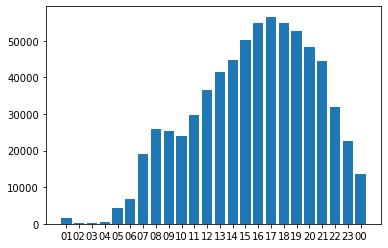

<BarContainer object of 24 artists>

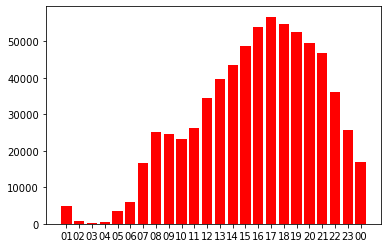

<BarContainer object of 24 artists>

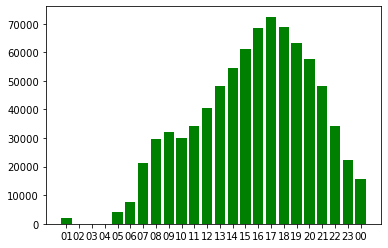

In [43]:
kellaajadLahti20Dict = {"01":0,"02":0,"03":0,"04":0,"05":0,"06":0,"07":0,"08":0,"09":0,"10":0,"11":0,"12":0,"13":0,"14":0,"15":0,"16":0,"17":0,"18":0,"19":0,"20":0,"21":0,"22":0,"23":0,"00":0}
#data2019.unlockedattime.str[:2]

for index, row in data2020.iterrows():
    #print(row['unlockedattime'][:2])
    kellaajadLahti20Dict[row['unlockedattime'][:2]] = kellaajadLahti20Dict[row['unlockedattime'][:2]] + 1

keysLahti20 = kellaajadLahti20Dict.keys()
valuesLahti20 = kellaajadLahti20Dict.values()

plt.bar(keysLahti20, valuesLahti20, color="green")

In [ ]:
kellaajadKinni20Dict = {"01":0,"02":0,"03":0,"04":0,"05":0,"06":0,"07":0,"08":0,"09":0,"10":0,"11":0,"12":0,"13":0,"14":0,"15":0,"16":0,"17":0,"18":0,"19":0,"20":0,"21":0,"22":0,"23":0,"00":0}
#data2019.unlockedattime.str[:2]

for index, row in data2020.iterrows():
    #print(row['unlockedattime'][:2])
    kellaajadKinni20Dict[row['lockedattime'][:2]] = kellaajadKinni20Dict[row['lockedattime'][:2]] + 1

keysKinni20 = kellaajadKinni20Dict.keys()
valuesKinni20 = kellaajadKinni20Dict.values()

plt.bar(keysKinni20, valuesKinni20, color="green")

<BarContainer object of 24 artists>

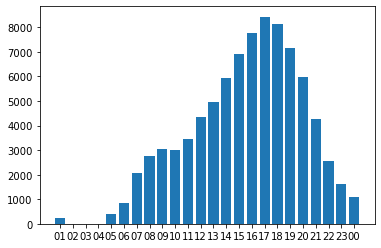

In [45]:
kellaajadLahti21Dict = {"01":0,"02":0,"03":0,"04":0,"05":0,"06":0,"07":0,"08":0,"09":0,"10":0,"11":0,"12":0,"13":0,"14":0,"15":0,"16":0,"17":0,"18":0,"19":0,"20":0,"21":0,"22":0,"23":0,"00":0}
#data2019.unlockedattime.str[:2]

for index, row in data2021.iterrows():
    #print(row['unlockedattime'][:2])
    kellaajadLahti21Dict[row['unlockedattime'][:2]] = kellaajadLahti21Dict[row['unlockedattime'][:2]] + 1

keysLahti21 = kellaajadLahti21Dict.keys()
valuesLahti21 = kellaajadLahti21Dict.values()

plt.bar(keysLahti21, valuesLahti21)

<BarContainer object of 24 artists>

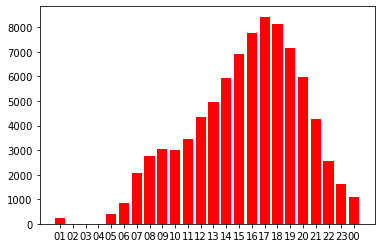

In [46]:
kellaajadKinni21Dict = {"01":0,"02":0,"03":0,"04":0,"05":0,"06":0,"07":0,"08":0,"09":0,"10":0,"11":0,"12":0,"13":0,"14":0,"15":0,"16":0,"17":0,"18":0,"19":0,"20":0,"21":0,"22":0,"23":0,"00":0}
#data2019.unlockedattime.str[:2]

for index, row in data2021.iterrows():
    #print(row['unlockedattime'][:2])
    kellaajadKinni21Dict[row['lockedattime'][:2]] = kellaajadKinni21Dict[row['unlockedattime'][:2]] + 1

keysKinni21 = kellaajadKinni21Dict.keys()
valuesKinni21 = kellaajadKinni21Dict.values()

plt.bar(keysKinni21, valuesKinni21, color="red")

In [41]:
#data2020 = data2020.drop(columns=['startstationserialnumber','endstationserialnumber'])
data2020 = data2020.drop(data2020[(data2020.startstationname == '-- Määramata --') | (data2020.endstationname == '-- Määramata --')].index)
data2020 = data2020.drop(data2020[(data2020.startstationname == 'Rahu 8') | (data2020.endstationname == 'Rahu 8')].index)
data2020 = data2020.drop(data2020[(data2020.startstationname == 'SPARK Demo') | (data2020.endstationname == 'SPARK Demo')].index)
data2020 = data2020.drop(data2020[(data2020.startstationname == 'Töökoda') | (data2020.endstationname == 'Töökoda')].index)
data2020 = data2020.drop(data2020[(data2020.startstationname == 'Undetermined') | (data2020.endstationname == 'Undetermined')].index)
data2020 = data2020.drop(data2020[(data2020.startstationname == 'Ihaste Päev') | (data2020.endstationname == 'Ihaste Päev')].index)
data2020 = data2020.drop(data2020[data2020['length'] < 0.05].index)
data2020 = data2020.drop(data2020[data2020.length == 0].index)

data2020['first3IdNumber'] = data2020['first3IdNumber'].fillna("NaN")
# Määra sünniaasta andmetüübiks 'sõne'.
data2020['yearOfBirth'] = data2020['yearOfBirth'].astype(str)
# Eemalda sünniaasta lõpust '.0'.
data2020['yearOfBirth'] = data2020['yearOfBirth'].str[:-2]
data2020['yearOfBirth'] = data2020['yearOfBirth'].replace('n', '000')

# Eemalda ID-kaardi numbrid, mille pikkus on lühem kui 3.
data2020 = data2020.drop(data2020[data2020['first3IdNumber'].str.len() != 3].index)
# Eemalda ID-kaardi numbrid, mis ei kuulu massiivi kaardi esimese numbri põhjal.
synNr = ['N','1','2','3','4','5','6']
data2020 = data2020.drop(data2020[~data2020['first3IdNumber'].str[0].isin(synNr)].index)

data2020.loc[((data2020['first3IdNumber'].str[0] == '1') | (data2020['first3IdNumber'].str[0] == '2')),'yearOfBirth'] = ('18' + data2020['first3IdNumber'].str[1:])
data2020.loc[((data2020['first3IdNumber'].str[0] == '3') | (data2020['first3IdNumber'].str[0] == '4')),'yearOfBirth'] = ('19' + data2020['first3IdNumber'].str[1:])
data2020.loc[((data2020['first3IdNumber'].str[0] == '5') | (data2020['first3IdNumber'].str[0] == '6')),'yearOfBirth'] = ('20' + data2020['first3IdNumber'].str[1:])

# Sünniaasta ja ID-kaardi numbrid ei kattu
data2020[['yearOfBirth', 'first3IdNumber']].loc[(data2020['yearOfBirth'].str[2:4] != data2020['first3IdNumber'].str[1:]) & ((data2020['yearOfBirth'].str[:3] != '000') & (data2020['first3IdNumber'] != 'NaN'))]
# Sünniaasta puudub, ID-kaart olemas
#data2020[['yearOfBirth', 'first3IdNumber']].loc[(data2020['yearOfBirth'].str[:3] == '000') & (data2020['first3IdNumber'] != 'NaN')]

#data2020[['yearOfBirth', 'first3IdNumber']]
#data2020['first3IdNumber'].unique()

,yearOfBirth,first3IdNumber


In [5]:
#data2021 = data2021.drop(columns=['startstationserialnumber','endstationserialnumber'])
data2021 = data2021.drop(data2021[(data2021.startstationname == 'SPARK Demo') | (data2021.endstationname == 'SPARK Demo')].index)
data2021 = data2021.drop(data2021[(data2021.startstationname == '-- Määramata --') | (data2021.endstationname == '-- Määramata --')].index)
data2021 = data2021.drop(data2021[(data2021.startstationname == 'Töökoda') | (data2021.endstationname == 'Töökoda')].index)
data2021 = data2021.drop(data2021[(data2021.startstationname == 'Undetermined') | (data2021.endstationname == 'Undetermined')].index)
data2021 = data2021.drop(data2021[data2021['length'] < 0.05].index)
data2021 = data2021.drop(data2021[data2021.length == 0].index)

data2021['first3IdNumber'] = data2021['first3IdNumber'].fillna("NaN")
# Määra sünniaasta andmetüübiks 'sõne'.
data2021['yearOfBirth'] = data2021['yearOfBirth'].astype(str)
# Eemalda sünniaasta lõpust '.0'.
data2021['yearOfBirth'] = data2021['yearOfBirth'].str[:-2]
data2021['yearOfBirth'] = data2021['yearOfBirth'].replace('n', '000')

# Eemalda ID-kaardi numbrid, mille pikkus on lühem kui 3.
data2021 = data2021.drop(data2021[data2021['first3IdNumber'].str.len() != 3].index)
# Eemalda ID-kaardi numbrid, mis ei kuulu massiivi kaardi esimese numbri põhjal.
synNr = ['N','1','2','3','4','5','6']
data2021 = data2021.drop(data2021[~data2021['first3IdNumber'].str[0].isin(synNr)].index)

data2021.loc[((data2021['first3IdNumber'].str[0] == '1') | (data2021['first3IdNumber'].str[0] == '2')),'yearOfBirth'] = ('18' + data2021['first3IdNumber'].str[1:])
data2021.loc[((data2021['first3IdNumber'].str[0] == '3') | (data2021['first3IdNumber'].str[0] == '4')),'yearOfBirth'] = ('19' + data2021['first3IdNumber'].str[1:])
data2021.loc[((data2021['first3IdNumber'].str[0] == '5') | (data2021['first3IdNumber'].str[0] == '6')),'yearOfBirth'] = ('20' + data2021['first3IdNumber'].str[1:])

# Sünniaasta ja ID-kaardi numbrid ei kattu
data2021[['yearOfBirth', 'first3IdNumber']].loc[(data2021['yearOfBirth'].str[2:4] != data2021['first3IdNumber'].str[1:]) & ((data2021['yearOfBirth'].str[:3] != '000') & (data2021['first3IdNumber'] != 'NaN'))]
# Sünniaasta puudub, ID-kaart olemas
#data2021[['yearOfBirth', 'first3IdNumber']].loc[(data2021['yearOfBirth'].str[:3] == '000') & (data2021['first3IdNumber'] != 'NaN')]

#data2021[['yearOfBirth', 'first3IdNumber']]
#data2021['first3IdNumber'].unique()



,yearOfBirth,first3IdNumber


In [6]:
andmed19end = dict(data2019['endstationname'].value_counts())
andmed19sta = dict(data2019['startstationname'].value_counts())

andmed21end = dict(data2021['endstationname'].value_counts())
andmed21end

andmed20end = dict(data2020['endstationname'].value_counts())
andmed21end
# for i in andmed:
#     print(andmed[i])

{'Uueturu': 3700,
 'Soola': 2869,
 'Turusild': 2231,
 'Vabadussild': 2096,
 'Eeden': 1968,
 'Annelinna kiir': 1955,
 'Annelinna keskus': 1844,
 'Raatuse': 1747,
 'Pirogovi plats': 1739,
 'Tarmeko': 1702,
 'Anne saun': 1517,
 'Aleksandri': 1475,
 'Rahu': 1455,
 'Veeriku': 1451,
 'Raudteejaam': 1416,
 'Annelinn': 1415,
 'Sõbra': 1364,
 'Pargi': 1286,
 'Kalda tee': 1274,
 'Kaunase puiestee': 1257,
 'Aparaaditehas': 1210,
 'Kannikese': 1207,
 'Papli': 1205,
 'Karete': 1194,
 'Delta': 1176,
 'Roosi': 1174,
 'Vanemuise park': 1165,
 'Ülejõe park': 1164,
 'Kopli': 1149,
 'Raatuse kool': 1105,
 'Kuu': 1070,
 'Näituse': 1065,
 'Rüütli': 1030,
 'Põhja puiestee': 1008,
 'Sõpruse sild': 999,
 'Mõisavahe': 989,
 'Magistri': 988,
 'Riiamäe': 969,
 'Aura veekeskus': 968,
 'W. Ostwaldi': 959,
 'Lõunakeskus': 941,
 'Tähtvere spordipark': 914,
 'Põllu': 877,
 'K. E. von Baeri': 848,
 'Torni': 832,
 'ERM': 825,
 'Orava': 791,
 'Vahi': 729,
 'Tamme puiestee': 720,
 'TÜ raamatukogu': 709,
 'J. Hurda': 700,

In [7]:
# Faili salvestamine

data2019.to_csv('data19cha.csv', index=False)
data2020.to_csv('data20cha.csv', index=False)
data2021.to_csv('data21cha.csv', index=False)